## Background on file format
https://www.10xgenomics.com/support/software/xenium-onboard-analysis/latest/analysis/xoa-output-zarr#cells
https://www.10xgenomics.com/support/software/xenium-onboard-analysis/latest/analysis/xoa-output-understanding-outputs

### If I understand zarr.zip, I can also move the transcripts instead of the images!

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [13]:
from insitupy import read_xenium
import zarr
import pandas as pd
import dask
import matplotlib.pyplot as plt
import numpy as np
import shutil
import dask.array as da
from pathlib import Path
from insitupy.utils.utils import convert_int_to_xenium_hex, convert_xenium_hex_to_int

In [3]:
xenium_file = r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted\output-XETG00050__0017313__N-42-20-T__20240112__124240"
zarr_file = r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted\output-XETG00050__0017313__N-42-20-T__20240112__124240\cells.zarr.zip"
parq_file = r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted\output-XETG00050__0017313__N-42-20-T__20240112__124240\cells.parquet"
#trans_file = r"C:\Users\ge37voy\Downloads\tmp\transcripts.zarr"
trans_file = r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted\output-XETG00050__0017313__N-42-20-T__20240112__124240\transcripts.zarr.zip"
ziptrans_file = r"C:\Users\ge37voy\Downloads\tmp\transcripts.zarr.zip"
transp_file = r"C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\output-XETG00050__0017321__N-436-21-N__20240112__124239\transcripts.parquet"
xd = read_xenium(xenium_file)
z = zarr.open(zarr_file, mode="r")
p = pd.read_parquet(parq_file)
t = zarr.open(trans_file, mode="r")
tp = pd.read_parquet(transp_file)

In [4]:
z

<zarr.hierarchy.Group '/' read-only>

In [21]:
bound_file = r"C:\Users\ge37voy\Github\InSituPy\notebooks\demo_dataset\demo_insitupy_project\cells\240321-164118017605-52f79735\boundaries.zarr.zip"
b = zarr.open(bound_file, mode="r")
#b = zarr.open(bound_file, mode="r")
b = da.from_zarr(bound_file, component="cell_id")

In [22]:
c = da.from_zarr(zarr_file, component="cell_id")

In [31]:
xd.read_cells()

Reading cells...


In [32]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted
Data folder:	output-XETG00050__0017313__N-42-20-T__20240112__124240
Metadata file:	experiment.xenium
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular

In [33]:
import random
import numpy as np

In [34]:
random_sample = random.sample(list(xd.cells.matrix.obs_names), 10000)

In [35]:
xd.cells.matrix = xd.cells.matrix[xd.cells.matrix.obs_names.isin(random_sample)].copy()

In [36]:
xd.cells.sync_cell_ids()

In [37]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted
Data folder:	output-XETG00050__0017313__N-42-20-T__20240112__124240
Metadata file:	experiment.xenium
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 10000 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
           varm: 'binned_expression'
       boundaries
           BoundariesData object with 2 entries:
               nuclear
               cellular

In [38]:
xd.show()

C:\Users\ge37voy\Github\InSituPy\insitupy\_core\xeniumdata.py:1529: UserWarning: No attribute `.images` found.
  warnings.warn("No attribute `.images` found.")


In [46]:
xd.save()

C:\Users\ge37voy\Github\InSituPy\insitupy\_core\xeniumdata.py:1332: UserWarning: Data as not loaded from an InSituPy project. Use `saveas()` instead to save the data to a new project folder.
  )


In [41]:
xd.metadata["path"]

'C:/Users/ge37voy/OneDrive - TUM/data/2315_VascularCancer_Mogler/2315-02-glioblastoma/20240112__122324__2315-02-Glioblastoma/shifted/output-XETG00050__0017313__N-42-20-T__20240112__124240'

In [43]:
xd.from_insitudata

False

In [7]:
print(z.tree())

/
 ├── cell_id (58264, 2) uint32
 ├── cell_summary (58264, 7) float64
 ├── masks
 │   ├── 0 (20539, 28483) uint32
 │   ├── 1 (20539, 28483) uint32
 │   └── homogeneous_transform (4, 4) float32
 ├── polygon_num_vertices (2, 58264) int32
 ├── polygon_vertices (2, 58264, 26) float32
 └── seg_mask_value (58264,) uint32


In [20]:
bgroups = list(b["masks"].groups())

In [23]:
g = bgroups[0]

In [28]:
g[0]

'cellular'

In [30]:
g[1]

<zarr.hierarchy.Group '/masks/cellular' read-only>

In [52]:
zipstore = zarr.ZipStore(bound_file, mode="r")

In [46]:
zipstore.listdir("masks/nuclear")

['.zgroup', '0', '1', '2', '3', '4', '5', '6']

In [54]:
zipstore.close()

In [59]:
b["masks"].attrs

In [55]:
bounds = {}
with zarr.ZipStore(bound_file, mode="r") as zipstore:
    for n in zipstore.listdir("masks"):
        if not n.startswith("."):
            # iterate through subresolutions
            components = zipstore.listdir(f"masks/{n}")

            if ".zarray" in components:
                bounds[n] = da.fromm_zarr(zipstore).persist()
            else:
                # it is stored as pyramid -> initialize a list for the pyramid
                bounds[n] = []
                for c in components:
                    if not c.startswith("."):
                        # append the pyramid to the list
                        bounds[n].append(da.from_zarr(zipstore, component=f"masks/{n}/{c}").persist())

In [60]:
bounds = {}

for n in ["nuclear", "cellular"]:
    with zarr.ZipStore(bound_file, mode="r") as zipstore:
        # iterate through subresolutions
        components = zipstore.listdir(f"masks/{n}")

        if ".zarray" in components:
            bounds[n] = da.fromm_zarr(zipstore).persist()
        else:
            # it is stored as pyramid -> initialize a list for the pyramid
            bounds[n] = []
            for c in components:
                if not c.startswith("."):
                    # append the pyramid to the list
                    bounds[n].append(da.from_zarr(zipstore, component=f"masks/{n}/{c}").persist())

In [61]:
bounds

{'nuclear': [dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(10270, 14242), dtype=uint32, chunksize=(4815, 6690), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(5135, 7121), dtype=uint32, chunksize=(5014, 6690), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(2568, 3561), dtype=uint32, chunksize=(2568, 3561), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(1284, 1781), dtype=uint32, chunksize=(1284, 1781), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(642, 891), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(321, 446), dtype=uint32, chunksize=(321, 446), chunktype=numpy.ndarray>],
 'cellular': [dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(10270, 14242), dtype=uint32, chunksize=(4815, 6690), chunktype=numpy.ndarray>,
  dask.a

In [ ]:
bounds

{'cellular': [dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(10270, 14242), dtype=uint32, chunksize=(4815, 6690), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(5135, 7121), dtype=uint32, chunksize=(5014, 6690), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(2568, 3561), dtype=uint32, chunksize=(2568, 3561), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(1284, 1781), dtype=uint32, chunksize=(1284, 1781), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(642, 891), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(321, 446), dtype=uint32, chunksize=(321, 446), chunktype=numpy.ndarray>],
 'nuclear': [dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>,
  dask.array<from-zarr, shape=(10270, 14242), dtype=uint32, chunksize=(4815, 6690), chunktype=numpy.ndarray>,
  dask.a

In [ ]:
nuc

In [9]:
list(b.groups())

[('masks', <zarr.hierarchy.Group '/masks' read-only>)]

In [6]:
b.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='cell_id (58264, 2) ui…

In [5]:
xd.read_cells()

Reading cells...


In [6]:
xd.saveas("tmp/testtest", overwrite=True)

Saving data to tmp\testtest
masks/nuclear/0
masks/nuclear/1
masks/nuclear/2
masks/nuclear/3
masks/nuclear/4
masks/nuclear/5
masks/nuclear/6
masks/cellular/0
masks/cellular/1
masks/cellular/2
masks/cellular/3
masks/cellular/4
masks/cellular/5
masks/cellular/6
here
Saved.


In [7]:
xr = read_xenium("tmp/testtest/")

In [9]:
xr.read_cells()

Reading cells...


ArrayNotFoundError: array not found at path %r' 'masks'

In [385]:
xd.cells.boundaries

BoundariesData object with 2 entries:
    nuclear
    cellular

In [386]:
xd.cells.boundaries.metadata

{'nuclear': {'pixel_size': 0.2125}, 'cellular': {'pixel_size': 0.2125}}

In [295]:
xd.cells.boundaries.seg_mask_value

dask.array<from-zarr, shape=(58264,), dtype=uint32, chunksize=(58264,), chunktype=numpy.ndarray>

In [296]:
cell_ids = xd.cells.boundaries.cell_ids

In [297]:
cell_ids

dask.array<from-zarr, shape=(58264, 2), dtype=uint32, chunksize=(29132, 2), chunktype=numpy.ndarray>

In [298]:
bound_data = xd.cells.boundaries.nuclear

In [299]:
ar = cell_ids[:,0].compute()

In [300]:
ar

array([     89330,     153462,     186043, ..., 3901996667, 3901997358,
       3902000739], dtype=uint32)

In [301]:
ar[np.array([0,1,110])]

array([  89330,  153462, 8038769], dtype=uint32)

In [302]:
import dask.array as da

In [303]:
d = da.from_zarr(zarr_file, component="cell_id")
s = da.from_zarr(zarr_file, component="cell_summary")
m = da.from_zarr(zarr_file, component="masks/0")
seg_mask_value = da.from_zarr(zarr_file, component="seg_mask_value")


In [304]:
d.compute()

array([[     89330,          1],
       [    153462,          1],
       [    186043,          1],
       ...,
       [3901996667,          1],
       [3901997358,          1],
       [3902000739,          1]], dtype=uint32)

In [305]:
seg_mask_value

dask.array<from-zarr, shape=(58264,), dtype=uint32, chunksize=(58264,), chunktype=numpy.ndarray>

In [306]:
x = 36895
s = hex(x)
s

'0x901f'

In [307]:
"aaaab".lstrip("a")

'b'

In [308]:
int(s, 16)

36895

In [309]:
seg_mask_value.compute()

array([    1,     2,     3, ..., 58262, 58263, 58264], dtype=uint32)

In [310]:
ar = m.compute()

In [311]:
ar[ar>0].max()

58264

In [312]:
cellids = d.compute()[:, 0]

In [313]:
import string

In [314]:
from insitupy.utils.utils import convert_xenium_hex_to_int, convert_int_to_xenium_hex

In [315]:
bound_data = xd.cells.boundaries.nuclear

In [316]:
%timeit da.unique(bound_data[bound_data>0]).compute()

3.9 s ± 1.1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [317]:
%timeit da.unique(bound_data).compute()[1:]

The slowest run took 18.52 times longer than the fastest. This could mean that an intermediate result is being cached.
12 s ± 20.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [318]:
da.unique(bound_data).compute()[1:]

array([    1,     2,     3, ..., 58262, 58263, 58264], dtype=uint32)

In [319]:
cell_ids = xd.cells.boundaries.cell_ids

In [320]:
ar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [321]:
cellnames = xd.cells.matrix.obs_names.astype(str)[:10000]

In [322]:
cellnames

Index(['aaabfmpc-1', 'aaacfhhg-1', 'aaacngll-1', 'aaadnblm-1', 'aaagabej-1',
       'aaagbcja-1', 'aaaildbb-1', 'aaajcbag-1', 'aaajkdpn-1', 'aaakfkho-1',
       ...
       'chhjloah-1', 'chhlclbg-1', 'chhljcjg-1', 'chhoamja-1', 'chhojeea-1',
       'chhpdmeg-1', 'chhpplmd-1', 'chiaalep-1', 'chibnggj-1', 'chiegjab-1'],
      dtype='object', length=10000)

In [323]:
bound_cell_ids_int = xd.cells.boundaries.cell_ids[:,0].compute()
bound_cell_ids_hex = [convert_int_to_xenium_hex(elem, dataset_suffix=1) for elem in bound_cell_ids_int]

In [324]:
bound_cell_ids_int

array([     89330,     153462,     186043, ..., 3901996667, 3901997358,
       3902000739], dtype=uint32)

In [325]:
seg_mask_value.compute()

array([    1,     2,     3, ..., 58262, 58263, 58264], dtype=uint32)

In [326]:
seg_mask_value = xd.cells.boundaries.seg_mask_value

In [327]:
not_in_matrix = seg_mask_value[np.where([elem not in cellnames for elem in bound_cell_ids_hex])[0]].compute()

In [328]:
not_in_matrix

array([10001, 10002, 10003, ..., 58262, 58263, 58264], dtype=uint32)

In [329]:
bound_data

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [330]:
bound_data[bound_data == not_in_matrix[0]] = 0

In [331]:
type(bound_data)

dask.array.core.Array

In [332]:
bound_data

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [333]:
print(bound_data)

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>


In [334]:
int(bound_data.max())

58264

In [349]:
_bound_data = bound_data.copy()

In [350]:
_bound_data

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [355]:
_bound_data[da.isin(_bound_data, not_in_matrix)] = 0

In [353]:
int(_bound_data.sum())

1521654703

In [354]:
int(bound_data.sum())

1180494759

In [356]:
int(bound_data.sum())

1180494759

In [357]:
print(_bound_data)

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>


In [358]:
print(bound_data)

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>


In [366]:
print(xd.cells.boundaries.nuclear)

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>


In [367]:
bound_data2 = xd.cells.boundaries.nuclear.copy()

In [368]:
print(bound_data2)

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>


In [369]:
bound_data2[da.isin(bound_data2, not_in_matrix)] = 0

In [373]:
bound_data

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [374]:
import zarr

In [375]:
from insitupy.image.utils import create_img_pyramid

In [ ]:
xd.cells.boundaries.seg_mask_value

In [377]:
seg_mask_value

dask.array<from-zarr, shape=(58264,), dtype=uint32, chunksize=(58264,), chunktype=numpy.ndarray>

In [378]:
cell_ids

dask.array<from-zarr, shape=(58264, 2), dtype=uint32, chunksize=(29132, 2), chunktype=numpy.ndarray>

In [379]:
pyramid = create_img_pyramid(bound_data)

with zarr.ZipStore("tmp/bound.zarr.zip", mode='w') as zipstore:
    for i, b in enumerate(pyramid):
        b.to_zarr(zipstore, component=f"mask/{i}")

    # save cell ids and seg_mask_values
    cell_ids.to_zarr(zipstore, component="cell_id")
    seg_mask_value.to_zarr(zipstore, component="seg_mask_value")

In [372]:
bound_data2

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [371]:
print(bound_data2)

dask.array<where, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>


In [339]:
bound_data.isin()

AttributeError: 'Array' object has no attribute 'isin'

In [337]:
for to_remove in not_in_matrix:
    _bound_data[_bound_data == to_remove] = 0

KeyboardInterrupt: 

In [ ]:
_bound_data

In [ ]:
not_in_matrix

array([10001, 10002, 10003, ..., 58262, 58263, 58264], dtype=uint32)

In [ ]:
del not_in_mask

In [ ]:
bound_cell_ids_hex

['aaabfmpc-1',
 'aaacfhhg-1',
 'aaacngll-1',
 'aaadnblm-1',
 'aaagabej-1',
 'aaagbcja-1',
 'aaaildbb-1',
 'aaajcbag-1',
 'aaajkdpn-1',
 'aaakfkho-1',
 'aaalcplh-1',
 'aaalmjck-1',
 'aaamnpbp-1',
 'aaanmldh-1',
 'aaaodcpf-1',
 'aaapgidg-1',
 'aaaphajm-1',
 'aaapkjej-1',
 'aaapofil-1',
 'aabacckl-1',
 'aabaemla-1',
 'aabaidgi-1',
 'aabdckfj-1',
 'aabdlipc-1',
 'aabehccn-1',
 'aabfagal-1',
 'aabggmhn-1',
 'aabhgmnm-1',
 'aabildga-1',
 'aabjdogo-1',
 'aabjffbl-1',
 'aabjljcb-1',
 'aabjpped-1',
 'aabkjado-1',
 'aabldhno-1',
 'aabldkkd-1',
 'aablggdf-1',
 'aabmchhn-1',
 'aacaabnn-1',
 'aacbgekc-1',
 'aacchbio-1',
 'aacdogni-1',
 'aacfgiem-1',
 'aachjial-1',
 'aacibgca-1',
 'aaciobfa-1',
 'aackappj-1',
 'aackibcj-1',
 'aacknijn-1',
 'aacljfbp-1',
 'aacnopkj-1',
 'aacopjgd-1',
 'aacpdnai-1',
 'aacppohc-1',
 'aadbkhop-1',
 'aadblplm-1',
 'aadeikfo-1',
 'aadeknmh-1',
 'aadhoiln-1',
 'aadicnob-1',
 'aadkadji-1',
 'aadkbajn-1',
 'aadlfccc-1',
 'aadlhfgl-1',
 'aadmkijo-1',
 'aadmmpnp-1',
 'aadogalb

In [ ]:
da.unique(bound_data).compute()

array([    0,     1,     2, ..., 58262, 58263, 58264], dtype=uint32)

In [ ]:
bound_data

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [ ]:
cellnames = xd.cells.matrix.obs_names

res = [convert_int_to_xenium_hex(elem) in cellnames for elem in cellids]

In [ ]:
np.all(res)

True

In [ ]:
convert_xenium_hex_to_int("aaabadf-1")

(4149, 1)

In [ ]:
186043 == convert_xenium_hex_to_int(convert_int_to_xenium_hex(186043))

True

In [ ]:
convert_xenium_hex_to_int("aaaaaaab")

1

In [ ]:
convert_int_to_xenium_hex(1)

'aaaaaaab'

In [ ]:
convert_int_to_xenium_hex(186043)

'aaacngll'

In [ ]:
arm = m.compute()

In [ ]:
arm[arm>0]

array([23475, 23475, 23475, ...,  2729,  2729,  2729], dtype=uint32)

In [ ]:
xd.cells.boundaries.nuclear

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [ ]:
arm[arm>0].max()

58264

In [ ]:
xd.cells.matrix.obs_names.str.contains("aaacfhhg")

array([False,  True, False, ..., False, False, False])

In [ ]:
xd.cells.matrix.obs_names

Index(['aaabfmpc-1', 'aaacfhhg-1', 'aaacngll-1', 'aaadnblm-1', 'aaagabej-1',
       'aaagbcja-1', 'aaaildbb-1', 'aaajcbag-1', 'aaajkdpn-1', 'aaakfkho-1',
       ...
       'oiippgdp-1', 'oijaehfc-1', 'oijccohb-1', 'oijcmacl-1', 'oijdamjo-1',
       'oijdgfff-1', 'oijdldlf-1', 'oijdlohl-1', 'oijdmbco-1', 'oijdmogd-1'],
      dtype='object', length=58264)

In [ ]:
conv_hex_repr = "".join([str(conv_dict[elem]) for elem in hex_repr])

In [ ]:
conv_hex_repr

'ffkpbaba'

In [ ]:
convert_int_to_xenium_hex(hex_repr=hex_repr, conv_dict=conv_dict)

'ffkpbaba'

In [ ]:
hex_repr.replace()

In [ ]:
hex_representation[0]

'1'

In [ ]:
hex()

In [ ]:
hex(cell_id_prefix)

'0x15cf2'

In [ ]:
xd.cells.matrix.obs_names

Index(['aaabfmpc-1', 'aaacfhhg-1', 'aaacngll-1', 'aaadnblm-1', 'aaagabej-1',
       'aaagbcja-1', 'aaaildbb-1', 'aaajcbag-1', 'aaajkdpn-1', 'aaakfkho-1',
       ...
       'oiippgdp-1', 'oijaehfc-1', 'oijccohb-1', 'oijcmacl-1', 'oijdamjo-1',
       'oijdgfff-1', 'oijdldlf-1', 'oijdlohl-1', 'oijdmbco-1', 'oijdmogd-1'],
      dtype='object', length=58264)

In [ ]:
d.compute()[:, 0].max()

3902000739

In [ ]:
np.unique(d.compute()[:, 1])

array([1], dtype=uint32)

In [ ]:
m.compute().max()

58264

In [ ]:
s.compute()

array([[1334.69909668, 2530.93383789,  205.19000745, ..., 2531.4152832 ,
          39.10531392,   24.        ],
       [1337.8984375 , 2550.28588867,  188.07578808, ..., 2551.58935547,
          50.93625185,   27.        ],
       [1345.15380859, 2540.04980469,  198.05531969, ..., 2539.28955078,
          89.31906574,   27.        ],
       ...,
       [5871.75488281,  879.58544922,  114.3807854 , ...,  878.30639648,
          29.39671982,   15.        ],
       [5877.37646484,  901.39233398,  316.04860522, ...,  901.71661377,
          41.95015777,   15.        ],
       [5881.19433594,  869.23028564,  373.66798231, ...,  874.60107422,
          45.20140789,   15.        ]])

In [ ]:
xd.read_cells()

Reading cells...


In [ ]:
",".join(map(str, xd.cells.matrix.obs.total_counts.unique()[:10]))

'201,204,177,153,96,245,167,94,33,114'

In [ ]:
",".join(map(xd.cells.matrix.obs.total_counts.unique()[:10], str))

TypeError: 'type' object is not iterable

In [ ]:
z.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='cell_id (58264, 2) ui…

In [ ]:
xd.read_cells()

Reading cells...


In [ ]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted
Data folder:	output-XETG00050__0017313__N-42-20-T__20240112__124240
Metadata file:	experiment.xenium
    ➤ cells
       matrix
           AnnData object with n_obs × n_vars = 58264 × 314
           obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
           var: 'gene_ids', 'feature_types', 'genome'
           obsm: 'spatial'
       boundaries
           BoundariesData object with 2 entries:
               cellular
               nuclear

In [ ]:
t.info

Name,/
Type,zarr.hierarchy.Group
Read-only,True
Store type,zarr.storage.ZipStore
No. members,4
No. arrays,2
No. groups,2
Arrays,"codeword_category, gene_category"
Groups,"density, grids"


In [ ]:
print(t.tree())

/
 ├── codeword_category (541, 7) bool
 ├── density
 │   └── gene
 │       ├── data (5460115,) uint16
 │       ├── indices (5460115,) uint16
 │       └── indptr (235877,) uint32
 ├── gene_category (541, 7) bool
 └── grids
     ├── 0
     │   ├── 0,0
     │   │   ├── codeword_identity (433, 2) uint16
     │   │   ├── gene_identity (433, 1) uint16
     │   │   ├── id (433, 2) uint32
     │   │   ├── location (433, 3) float32
     │   │   ├── quality_score (433, 1) float32
     │   │   ├── status (433, 1) uint8
     │   │   ├── uuid (433, 2) uint32
     │   │   └── valid (433, 1) uint8
     │   ├── 0,1
     │   │   ├── codeword_identity (571, 2) uint16
     │   │   ├── gene_identity (571, 1) uint16
     │   │   ├── id (571, 2) uint32
     │   │   ├── location (571, 3) float32
     │   │   ├── quality_score (571, 1) float32
     │   │   ├── status (571, 1) uint8
     │   │   ├── uuid (571, 2) uint32
     │   │   └── valid (571, 1) uint8
     │   ├── 0,10
     │   │   ├── codeword_identity 

## Important feature: `.attrs` - this is where gene names, etc. are saved!

In [ ]:
list(t.attrs)

['codeword_count',
 'codeword_gene_mapping',
 'codeword_gene_names',
 'coordinate_space',
 'data_format',
 'dataset_uuid',
 'fov_names',
 'gene_index_map',
 'gene_names',
 'major_version',
 'minor_version',
 'name',
 'number_genes',
 'number_rnas',
 'spatial_units']

In [ ]:
t.attrs["gene_names"]

['A2ML1',
 'ABCC9',
 'ABCD4',
 'ABO',
 'ACKR1',
 'ACTA2',
 'ACTN2',
 'ADAM33',
 'ADGRF5',
 'AFF3',
 'AIM2',
 'AIRN',
 'ALOX15',
 'ALOX5',
 'ANXA1',
 'APLNR',
 'APOE',
 'ATG12',
 'ATM',
 'ATP2B1',
 'AURKA',
 'AURKB',
 'BAD',
 'BAK1',
 'BAX',
 'BBC3',
 'BECN1',
 'BIRC5',
 'BMPR2',
 'BMX',
 'BPTF',
 'BRCA1',
 'BRCA2',
 'BST2',
 'C2CD4D',
 'CALCRL',
 'CALD1',
 'CARMN',
 'CASP1',
 'CASP3',
 'CCDC102B',
 'CCDC144A',
 'CCL18',
 'CCL2',
 'CCL3',
 'CCL3L1',
 'CCR2',
 'CD14',
 'CD160',
 'CD163',
 'CD19',
 'CD2',
 'CD22',
 'CD34',
 'CD36',
 'CD3D',
 'CD4',
 'CD47',
 'CD68',
 'CD7',
 'CD79A',
 'CD8A',
 'CDC20',
 'CDH11',
 'CDH5',
 'CDH6',
 'CDK1',
 'CEP295NL',
 'CHEK2',
 'CLEC4C',
 'CLEC9A',
 'CLNK',
 'CMTM2',
 'CNN1',
 'CNN3',
 'COL18A1',
 'COL1A2',
 'COL3A1',
 'COL5A2',
 'CPA3',
 'CRYAB',
 'CSF3R',
 'CTSB',
 'CTSD',
 'CXCL3',
 'CXCR1',
 'CXCR2',
 'CXCR4',
 'CYP4X1',
 'DANT2',
 'DCN',
 'DDT',
 'DDTL',
 'DIPK2B',
 'DKK2',
 'DLGAP5',
 'DLX5',
 'DLX6',
 'DLX6-AS1',
 'DNASE1L3',
 'DSTN',
 'E2F8',
 'E

In [ ]:
from os.path import dirname
from datetime import datetime

In [ ]:
f"_{f'{datetime.now():%Y%m%d__%H%M%S}'}.out"

'_20240212__130117.out'

In [ ]:
t_start_batch = datetime.now()
f'{t_start_batch:%Y%m%d__%H%M%S}'

'20240212__130247'

In [ ]:
f"_{f'{datetime.now():%H%M%S}'}.out"

'_130107.out'

In [ ]:
dirname(zarr_file)

'C:\\Users\\ge37voy\\OneDrive - TUM\\data\\2315_VascularCancer_Mogler\\2315-02-glioblastoma\\20240112__122324__2315-02-Glioblastoma\\shifted\\output-XETG00050__0017313__N-42-20-T__20240112__124240'

In [ ]:
Path(zarr_file).parent

WindowsPath('C:/Users/ge37voy/OneDrive - TUM/data/2315_VascularCancer_Mogler/2315-02-glioblastoma/20240112__122324__2315-02-Glioblastoma/shifted/output-XETG00050__0017313__N-42-20-T__20240112__124240')

In [ ]:
str(True).lower()

'true'

In [ ]:
t.attrs["gene_index_map"]

{'A2ML1': 0,
 'ABCC9': 1,
 'ABCD4': 2,
 'ABO': 3,
 'ACKR1': 4,
 'ACTA2': 5,
 'ACTN2': 6,
 'ADAM33': 7,
 'ADGRF5': 8,
 'AFF3': 9,
 'AIM2': 10,
 'AIRN': 11,
 'ALOX15': 12,
 'ALOX5': 13,
 'ANXA1': 14,
 'APLNR': 15,
 'APOE': 16,
 'ATG12': 17,
 'ATM': 18,
 'ATP2B1': 19,
 'AURKA': 20,
 'AURKB': 21,
 'BAD': 22,
 'BAK1': 23,
 'BAX': 24,
 'BBC3': 25,
 'BECN1': 26,
 'BIRC5': 27,
 'BMPR2': 28,
 'BMX': 29,
 'BPTF': 30,
 'BRCA1': 31,
 'BRCA2': 32,
 'BST2': 33,
 'C2CD4D': 34,
 'CALCRL': 35,
 'CALD1': 36,
 'CARMN': 37,
 'CASP1': 38,
 'CASP3': 39,
 'CCDC102B': 40,
 'CCDC144A': 41,
 'CCL18': 42,
 'CCL2': 43,
 'CCL3': 44,
 'CCL3L1': 45,
 'CCR2': 46,
 'CD14': 47,
 'CD160': 48,
 'CD163': 49,
 'CD19': 50,
 'CD2': 51,
 'CD22': 52,
 'CD34': 53,
 'CD36': 54,
 'CD3D': 55,
 'CD4': 56,
 'CD47': 57,
 'CD68': 58,
 'CD7': 59,
 'CD79A': 60,
 'CD8A': 61,
 'CDC20': 62,
 'CDH11': 63,
 'CDH5': 64,
 'CDH6': 65,
 'CDK1': 66,
 'CEP295NL': 67,
 'CHEK2': 68,
 'CLEC4C': 69,
 'CLEC9A': 70,
 'CLNK': 71,
 'CMTM2': 72,
 'CNN1': 7

In [ ]:
list(t["density/gene/"].attrs)

['cols', 'gene_names', 'grid_size', 'origin', 'rows']

In [ ]:
t["density/gene/"].attrs["cols"]

606

In [ ]:
t["density/gene/"].attrs["rows"]

436

In [ ]:
485 * 435

210975

In [ ]:
t["density/gene/"].attrs["grid_size"]

[10.0, 10.0]

In [ ]:
t["density/gene/data"][:]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

## Create sparse matrix from binned data

Under `/density/gene/ ` the binned transcript distribution is saved. This would be nice for visualization. Here I want to try to recover it.

In [ ]:
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix

In [ ]:
data_gene = t["density/gene"]
data = data_gene["data"][:]
indices = data_gene["indices"][:]
indptr = data_gene["indptr"][:]
cols = data_gene.attrs["cols"]
rows = data_gene.attrs["rows"]
n_genes = len(data_gene.attrs["gene_names"])

sarr = csr_matrix((data, indices, indptr))

In [ ]:
indices

array([305, 453, 293, ..., 513,  99,  17], dtype=uint16)

In [ ]:
indices.max()

605

In [ ]:
indptr

array([      0,       0,       0, ..., 5460115, 5460115, 5460115],
      dtype=uint32)

In [ ]:
indptr.shape

(235877,)

In [ ]:
sarr

<235876x606 sparse matrix of type '<class 'numpy.uint16'>'
	with 5460115 stored elements in Compressed Sparse Row format>

In [ ]:
arr = sarr.toarray()
arr = arr.reshape((n_genes, rows, cols))

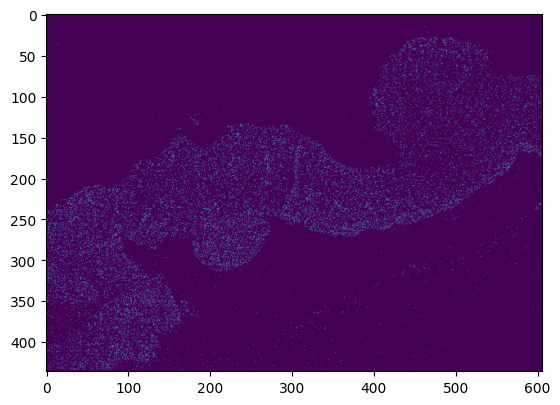

In [ ]:
plt.imshow(arr[0])

In [ ]:
cols

606

In [ ]:
cols

606

In [ ]:
rows

436

In [ ]:
indices.max()

605

In [ ]:
cols

606

In [ ]:
sarr[:, 3].toarray()

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint16)

In [ ]:
list(data_gene.attrs)

['cols', 'gene_names', 'grid_size', 'origin', 'rows']

In [ ]:
sarr

<235876x606 sparse matrix of type '<class 'numpy.uint16'>'
	with 5460115 stored elements in Compressed Sparse Row format>

In [ ]:
sarr.toarray().shape

(235876, 606)

In [ ]:
img = sarr[:, 5].reshape((rows, cols))

ValueError: cannot reshape array of size 235876 into shape (436, 606)

In [ ]:
cols * rows

264216

In [ ]:
img

<436x541 sparse matrix of type '<class 'numpy.uint16'>'
	with 6946 stored elements in COOrdinate format>

In [ ]:
img.max()

19

In [ ]:
img.min()

0

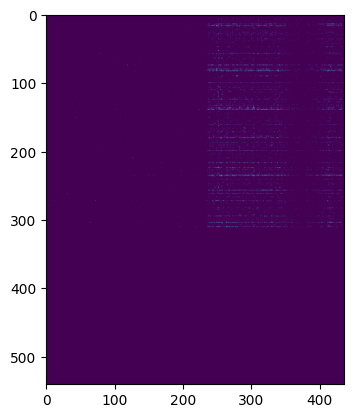

In [ ]:
plt.imshow(img.toarray())

In [ ]:
indices

array([385, 432, 384, ..., 408, 154, 462], dtype=uint16)

In [ ]:
rows

435

In [ ]:
data_gene.attrs["rows"]

435

In [ ]:
data_gene.tree()

Tree(nodes=(Node(disabled=True, name='gene', nodes=(Node(disabled=True, icon='table', name='data (5217308,) ui…

In [ ]:
indices.max()

484

In [ ]:
sarr

<235335x485 sparse matrix of type '<class 'numpy.uint16'>'
	with 5217308 stored elements in Compressed Sparse Row format>

In [ ]:
sarr.toarray()

(235335, 485)

In [ ]:
235335 / 435

541.0

### Select one gene and recover the binned matrix

In [ ]:
print(t.tree())

/
 ├── codeword_category (541, 7) bool
 ├── density
 │   └── gene
 │       ├── data (5217308,) uint16
 │       ├── indices (5217308,) uint16
 │       └── indptr (235336,) uint32
 ├── gene_category (541, 7) bool
 └── grids
     ├── 0
     │   ├── 0,14
     │   │   ├── codeword_identity (226, 2) uint16
     │   │   ├── gene_identity (226, 1) uint16
     │   │   ├── id (226, 2) uint32
     │   │   ├── location (226, 3) float32
     │   │   ├── quality_score (226, 1) float32
     │   │   ├── status (226, 1) uint8
     │   │   ├── uuid (226, 2) uint32
     │   │   └── valid (226, 1) uint8
     │   ├── 0,15
     │   │   ├── codeword_identity (388, 2) uint16
     │   │   ├── gene_identity (388, 1) uint16
     │   │   ├── id (388, 2) uint32
     │   │   ├── location (388, 3) float32
     │   │   ├── quality_score (388, 1) float32
     │   │   ├── status (388, 1) uint8
     │   │   ├── uuid (388, 2) uint32
     │   │   └── valid (388, 1) uint8
     │   ├── 0,16
     │   │   ├── codeword_identit

In [ ]:
gene = "ACTN2"
#gene_loc = t.attrs["gene_names"].index(gene)
gene_loc = t.attrs["gene_index_map"][gene]

In [ ]:
gene_loc

6

In [ ]:
indices.max()

484

In [ ]:
t.attrs["gene_index_map"]

{'A2ML1': 0,
 'ABCC9': 1,
 'ABCD4': 2,
 'ABO': 3,
 'ACKR1': 4,
 'ACTA2': 5,
 'ACTN2': 6,
 'ADAM33': 7,
 'ADGRF5': 8,
 'AFF3': 9,
 'AIM2': 10,
 'AIRN': 11,
 'ALOX15': 12,
 'ALOX5': 13,
 'ANXA1': 14,
 'APLNR': 15,
 'APOE': 16,
 'ATG12': 17,
 'ATM': 18,
 'ATP2B1': 19,
 'AURKA': 20,
 'AURKB': 21,
 'BAD': 22,
 'BAK1': 23,
 'BAX': 24,
 'BBC3': 25,
 'BECN1': 26,
 'BIRC5': 27,
 'BMPR2': 28,
 'BMX': 29,
 'BPTF': 30,
 'BRCA1': 31,
 'BRCA2': 32,
 'BST2': 33,
 'C2CD4D': 34,
 'CALCRL': 35,
 'CALD1': 36,
 'CARMN': 37,
 'CASP1': 38,
 'CASP3': 39,
 'CCDC102B': 40,
 'CCDC144A': 41,
 'CCL18': 42,
 'CCL2': 43,
 'CCL3': 44,
 'CCL3L1': 45,
 'CCR2': 46,
 'CD14': 47,
 'CD160': 48,
 'CD163': 49,
 'CD19': 50,
 'CD2': 51,
 'CD22': 52,
 'CD34': 53,
 'CD36': 54,
 'CD3D': 55,
 'CD4': 56,
 'CD47': 57,
 'CD68': 58,
 'CD7': 59,
 'CD79A': 60,
 'CD8A': 61,
 'CDC20': 62,
 'CDH11': 63,
 'CDH5': 64,
 'CDH6': 65,
 'CDK1': 66,
 'CEP295NL': 67,
 'CHEK2': 68,
 'CLEC4C': 69,
 'CLEC9A': 70,
 'CLNK': 71,
 'CMTM2': 72,
 'CNN1': 7

In [ ]:
list(t.attrs)

['codeword_count',
 'codeword_gene_mapping',
 'codeword_gene_names',
 'coordinate_space',
 'data_format',
 'dataset_uuid',
 'fov_names',
 'gene_index_map',
 'gene_names',
 'major_version',
 'minor_version',
 'name',
 'number_genes',
 'number_rnas',
 'spatial_units']

In [ ]:
np.max(t.attrs["codeword_gene_mapping"])

540

In [ ]:
t["density/gene/indptr"][:]

array([      0,       0,       0, ..., 5217308, 5217308, 5217308],
      dtype=uint32)

In [ ]:
t["density/gene/indices"][:]

array([385, 432, 384, ..., 408, 154, 462], dtype=uint16)

In [ ]:
t["density"]["gene"]["data"][:]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [ ]:
t["codeword_category"].zattrs

AttributeError: 'Array' object has no attribute 'zattrs'

In [ ]:
t["density"]["gene"]["data"][:]

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [ ]:
t["grids"].tree()

Tree(nodes=(Node(disabled=True, name='grids', nodes=(Node(disabled=True, name='0', nodes=(Node(disabled=True, …

In [ ]:
list(t["density"].keys())

['gene']

In [ ]:
import warnings

## Manipulate arrays within a zipped zarr container

In [ ]:
# copy file
ziptrans_file = Path(ziptrans_file)
newfile = ziptrans_file.parent / (ziptrans_file.name.split(".")[0] + "_corrected.zarr.zip")
shutil.copyfile(ziptrans_file, newfile)

with warnings.catch_warnings():
    # ignore UserWarning about duplicate names
    warnings.filterwarnings("ignore", message="Duplicate name")

    # change zipped zarr storage in place
    with zarr.ZipStore(newfile, mode='a') as store:
        # open zarr store
        t = zarr.open(store, mode='a')

        for grid_key, grid in t["grids"].items():
            for subgrid_key, subgrid in grid.items():
                # extract location array
                arr = subgrid["location"]

                # change array
                arr[:, :2] += 100


In [ ]:
tnew = zarr.open(newfile, mode='a')

In [ ]:
tnew["grids/0/0,14/location"][:]

array([[1211.6409   , 4736.6846   ,   13.66286  ],
       [1233.0607   , 4672.212    ,   13.607229 ],
       [1243.8961   , 4733.3545   ,   13.517339 ],
       [1082.5349   , 4643.4746   ,   13.939162 ],
       [1032.282    , 4634.182    ,   13.898584 ],
       [1037.877    , 4607.8105   ,   13.949106 ],
       [1079.0822   , 4672.0874   ,   14.002849 ],
       [1228.8286   , 4612.178    ,   13.601787 ],
       [1112.413    , 4608.032    ,   13.737013 ],
       [1147.7504   , 4653.7227   ,   13.730479 ],
       [1181.6138   , 4707.068    ,   13.698565 ],
       [1213.7694   , 4666.707    ,   13.753146 ],
       [1228.9088   , 4638.9766   ,   13.53697  ],
       [1236.9608   , 4707.9053   ,   13.485916 ],
       [1014.36346  , 4614.45     ,   13.996559 ],
       [1015.8827   , 4744.9517   ,   14.027182 ],
       [1034.0234   , 4604.917    ,   13.9277525],
       [1070.6469   , 4649.695    ,   13.8516035],
       [1185.2583   , 4682.3887   ,   13.635107 ],
       [1045.4431   , 4729.5244

In [ ]:
tnew[]

In [ ]:
with zarr.ZipStore(newfile, mode='a') as store:
    # open zarr store
    z = zarr.open(store, mode='a')

    grids = t["grids"].keys()
    for grid in grids:
        subgrids = grids
        # retrieve array
        arr = z["grids/0/0,14/location"][:]

        # change array
        arr = arr[:, :2] + 10

        #

In [ ]:
with zarr.ZipStore(newfile, mode='a') as store:
    zz = zarr.open(store, mode='a')
    arr = zz["grids/0/0,14/location"][:] + 1000
    zz["grids/0/0,14/location"][:] = arr
    print(zz["grids/0/0,14/location"][:])
    print(list(zz["grids"].keys()))

[[ 7211.6406 10736.685   7013.663 ]
 [ 7233.0605 10672.212   7013.6074]
 [ 7243.896  10733.3545  7013.5176]
 [ 7082.535  10643.475   7013.9395]
 [ 7032.282  10634.182   7013.8984]
 [ 7037.877  10607.811   7013.949 ]
 [ 7079.082  10672.088   7014.003 ]
 [ 7228.8286 10612.178   7013.6016]
 [ 7112.413  10608.032   7013.7373]
 [ 7147.7505 10653.723   7013.7305]
 [ 7181.614  10707.068   7013.698 ]
 [ 7213.7695 10666.707   7013.753 ]
 [ 7228.9087 10638.977   7013.537 ]
 [ 7236.961  10707.905   7013.486 ]
 [ 7014.3633 10614.45    7013.9966]
 [ 7015.883  10744.951   7014.0273]
 [ 7034.0234 10604.917   7013.9277]
 [ 7070.647  10649.695   7013.8516]
 [ 7185.2583 10682.389   7013.6353]
 [ 7045.4434 10729.524   7013.8633]
 [ 7153.817  10749.182   7013.878 ]
 [ 7176.5596 10745.341   7013.6   ]
 [ 7192.917  10685.058   7013.788 ]
 [ 7205.8857 10659.945   7013.5503]
 [ 7207.1772 10602.892   7013.4854]
 [ 7214.2583 10737.47    7013.545 ]
 [ 7231.0576 10642.949   7013.6836]
 [ 7231.6904 10642.695   701

In [ ]:
arr = t["grids/0/0,14/location"][:]

In [ ]:
t["grids/0/0,14/location"][:] = arr + 1000

In [ ]:
t = zarr.open(trans_file, mode="a")


In [ ]:
t["grids/0/0,14/location"][:]

array([[1211.6409 , 4736.6846 , 1013.66284],
       [1233.0607 , 4672.212  , 1013.60724],
       [1243.8961 , 4733.3545 , 1013.51733],
       [1082.5349 , 4643.4746 , 1013.93915],
       [1032.282  , 4634.182  , 1013.89856],
       [1037.877  , 4607.8105 , 1013.9491 ],
       [1079.0822 , 4672.0874 , 1014.00287],
       [1228.8286 , 4612.178  , 1013.6018 ],
       [1112.413  , 4608.032  , 1013.737  ],
       [1147.7504 , 4653.7227 , 1013.73047],
       [1181.6138 , 4707.068  , 1013.69855],
       [1213.7694 , 4666.707  , 1013.7532 ],
       [1228.9088 , 4638.9766 , 1013.537  ],
       [1236.9608 , 4707.9053 , 1013.4859 ],
       [1014.36346, 4614.45   , 1013.9966 ],
       [1015.8827 , 4744.9517 , 1014.02716],
       [1034.0234 , 4604.917  , 1013.92773],
       [1070.6469 , 4649.695  , 1013.8516 ],
       [1185.2583 , 4682.3887 , 1013.63513],
       [1045.4431 , 4729.5244 , 1013.863  ],
       [1153.817  , 4749.182  , 1013.878  ],
       [1176.5598 , 4745.341  , 1013.60016],
       [11

In [ ]:
zarr.save_array(trans_file, arr=arr, path="grids/0/0,14/location")

In [ ]:
z = zarr.open(trans_file, mode='a')

In [ ]:
savefile = trans_file.parent / "new.zarr.zip"

In [ ]:
da = dask.array.from_zarr(trans_file, component="grids/0/0,14/location")
daa = dask.array.from_zarr(trans_file, component="grids/0/0,14/location") + 1000

In [ ]:
da

dask.array<from-zarr, shape=(226, 3), dtype=float32, chunksize=(226, 1), chunktype=numpy.ndarray>

In [ ]:
dask.array.to_zarr(arr=daa, url=trans_file, component="grids/0/0,14/location")

In [ ]:
daa.to_zarr(trans_file, component="grids/0/0,14/location")

In [ ]:
daaa = dask.array.from_zarr(trans_file, component="grids/0/0,14/location")

BadZipFile: File is not a zip file

In [ ]:
daaa.

In [ ]:
da.compute()

array([[ 211.64091  , 3736.6843   ,   13.66286  ],
       [ 233.06067  , 3672.2122   ,   13.607229 ],
       [ 243.89607  , 3733.3547   ,   13.517339 ],
       [  82.53492  , 3643.4746   ,   13.939162 ],
       [  32.28204  , 3634.1821   ,   13.898584 ],
       [  37.876923 , 3607.8105   ,   13.949106 ],
       [  79.08213  , 3672.0874   ,   14.002849 ],
       [ 228.82861  , 3612.1782   ,   13.601787 ],
       [ 112.41299  , 3608.0322   ,   13.737013 ],
       [ 147.75041  , 3653.7224   ,   13.730479 ],
       [ 181.61377  , 3707.0679   ,   13.698565 ],
       [ 213.76941  , 3666.7073   ,   13.753146 ],
       [ 228.90884  , 3638.9766   ,   13.53697  ],
       [ 236.96086  , 3707.905    ,   13.485916 ],
       [  14.363462 , 3614.4504   ,   13.996559 ],
       [  15.882666 , 3744.9517   ,   14.027182 ],
       [  34.0235   , 3604.9167   ,   13.9277525],
       [  70.646805 , 3649.6948   ,   13.8516035],
       [ 185.25827  , 3682.3887   ,   13.635107 ],
       [  45.44315  , 3729.5247

In [ ]:
da.compute()

array([[1211.6409 , 4736.6846 , 1013.66284],
       [1233.0607 , 4672.212  , 1013.60724],
       [1243.8961 , 4733.3545 , 1013.51733],
       [1082.5349 , 4643.4746 , 1013.93915],
       [1032.282  , 4634.182  , 1013.89856],
       [1037.877  , 4607.8105 , 1013.9491 ],
       [1079.0822 , 4672.0874 , 1014.00287],
       [1228.8286 , 4612.178  , 1013.6018 ],
       [1112.413  , 4608.032  , 1013.737  ],
       [1147.7504 , 4653.7227 , 1013.73047],
       [1181.6138 , 4707.068  , 1013.69855],
       [1213.7694 , 4666.707  , 1013.7532 ],
       [1228.9088 , 4638.9766 , 1013.537  ],
       [1236.9608 , 4707.9053 , 1013.4859 ],
       [1014.36346, 4614.45   , 1013.9966 ],
       [1015.8827 , 4744.9517 , 1014.02716],
       [1034.0234 , 4604.917  , 1013.92773],
       [1070.6469 , 4649.695  , 1013.8516 ],
       [1185.2583 , 4682.3887 , 1013.63513],
       [1045.4431 , 4729.5244 , 1013.863  ],
       [1153.817  , 4749.182  , 1013.878  ],
       [1176.5598 , 4745.341  , 1013.60016],
       [11

In [ ]:
print(t.tree(level=3))

/
 ├── codeword_category (541, 7) bool
 ├── density
 │   └── gene
 │       ├── data (5217308,) uint16
 │       ├── indices (5217308,) uint16
 │       └── indptr (235336,) uint32
 ├── gene_category (541, 7) bool
 └── grids
     ├── 0
     │   ├── 0,14
     │   ├── 0,15
     │   ├── 0,16
     │   ├── 0,17
     │   ├── 0,2
     │   ├── 0,3
     │   ├── 0,4
     │   ├── 0,5
     │   ├── 0,6
     │   ├── 0,7
     │   ├── 0,8
     │   ├── 1,14
     │   ├── 1,15
     │   ├── 1,16
     │   ├── 1,17
     │   ├── 1,2
     │   ├── 1,3
     │   ├── 1,4
     │   ├── 1,5
     │   ├── 1,6
     │   ├── 1,7
     │   ├── 1,8
     │   ├── 10,10
     │   ├── 10,11
     │   ├── 10,12
     │   ├── 10,13
     │   ├── 10,14
     │   ├── 10,15
     │   ├── 10,16
     │   ├── 10,17
     │   ├── 10,2
     │   ├── 10,3
     │   ├── 10,4
     │   ├── 10,5
     │   ├── 10,6
     │   ├── 10,7
     │   ├── 10,8
     │   ├── 10,9
     │   ├── 11,10
     │   ├── 11,11
     │   ├── 11,12
     │   ├── 11,13
     │   ├── 

In [ ]:
t = zarr.open(trans_file, component)

In [ ]:
zarr.__version__

'2.16.1'

In [ ]:
import numcodecs

In [ ]:
numcodecs.__version__

'0.11.0'

In [ ]:
z.tree()

AttributeError: 'Tree' object has no attribute '_repr_mimebundle_'

/
 ├── cell_id (58264, 2) uint32
 ├── cell_summary (58264, 7) float64
 ├── masks
 │   ├── 0 (20539, 28483) uint32
 │   ├── 1 (20539, 28483) uint32
 │   └── homogeneous_transform (4, 4) float32
 ├── polygon_num_vertices (2, 58264) int32
 ├── polygon_vertices (2, 58264, 26) float32
 └── seg_mask_value (58264,) uint32

In [ ]:
t.tree()

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



/
 ├── codeword_category (541, 7) bool
 ├── density
 │   └── gene
 │       ├── data (5217308,) uint16
 │       ├── indices (5217308,) uint16
 │       └── indptr (235336,) uint32
 ├── gene_category (541, 7) bool
 └── grids
     ├── 0
     │   ├── 0,14
     │   │   ├── codeword_identity (226, 2) uint16
     │   │   ├── gene_identity (226, 1) uint16
     │   │   ├── id (226, 2) uint32
     │   │   ├── location (226, 3) float32
     │   │   ├── quality_score (226, 1) float32
     │   │   ├── status (226, 1) uint8
     │   │   ├── uuid (226, 2) uint32
     │   │   └── valid (226, 1) uint8
     │   ├── 0,15
     │   │   ├── codeword_identity (388, 2) uint16
     │   │   ├── gene_identity (388, 1) uint16
     │   │   ├── id (388, 2) uint32
     │   │   ├── location (388, 3) float32
     │   │   ├── quality_score (388, 1) float32
     │   │   ├── status (388, 1) uint8
     │   │   ├── uuid (388, 2) uint32
     │   │   └── valid (388, 1) uint8
     │   ├── 0,16
     │   │   ├── codeword_identit

In [ ]:
t["grids"][:]

KeyError: slice(None, None, None)

In [ ]:
t.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='codeword_category (54…

In [ ]:
t.grids

<zarr.hierarchy.Group '/grids'>

In [ ]:
zero = dask.array.from_zarr(zarr_file, component="masks/0")
one = dask.array.from_zarr(zarr_file, component="masks/1")

In [ ]:
zero

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [ ]:
zero.compute().max()

58264

In [ ]:
zerocrop.compute().max()

0

In [ ]:
zerocrop = zero[10000:15000, 10000:15000]
onecrop = one[1000:1200, 1000:1200]

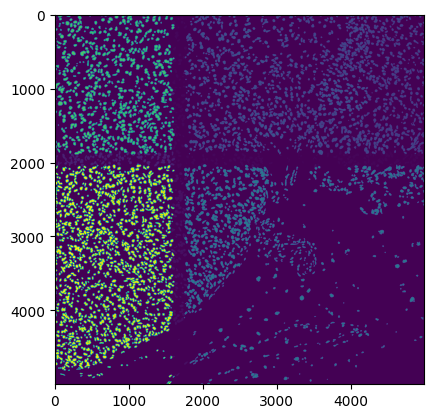

In [ ]:
plt.imshow(zerocrop)

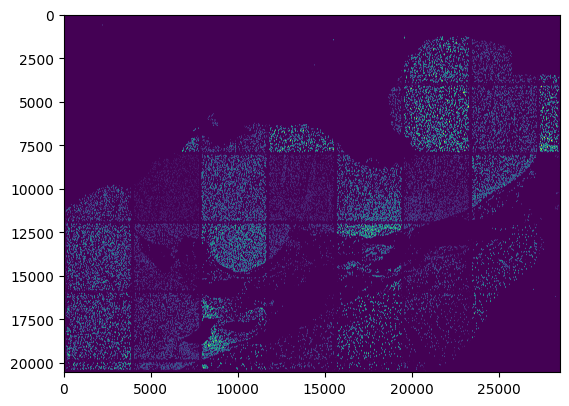

In [ ]:
plt.imshow(zero)

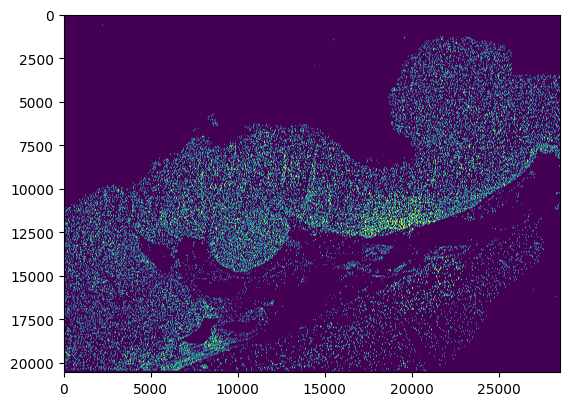

In [ ]:
plt.imshow(zero > 0)

In [ ]:
zero

dask.array<from-zarr, shape=(20539, 28483), dtype=uint32, chunksize=(642, 891), chunktype=numpy.ndarray>

In [ ]:
dask.array.from_zarr(zarr_file, component="seg_mask_value")

dask.array<from-zarr, shape=(58264,), dtype=uint32, chunksize=(58264,), chunktype=numpy.ndarray>

In [ ]:
xd.load_images()

Reading images...


In [ ]:
xd

XeniumData
Slide ID:	0017313
Sample ID:	N-42-20-T
Data path:	C:\Users\ge37voy\OneDrive - TUM\data\2315_VascularCancer_Mogler\2315-02-glioblastoma\20240112__122324__2315-02-Glioblastoma\shifted
Data folder:	output-XETG00050__0017313__N-42-20-T__20240112__124240
Metadata file:	experiment.xenium
    ➤ images
       nuclei:	(20539, 28483)

In [ ]:
z.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='cell_id (58264, 2) ui…

In [ ]:
z["masks"]["0"][:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

In [ ]:
z["masks"]["homogeneous_transform"][:]

array([[4.705882, 0.      , 0.      , 0.      ],
       [0.      , 4.705882, 0.      , 0.      ],
       [0.      , 0.      , 1.      , 0.      ],
       [0.      , 0.      , 0.      , 1.      ]], dtype=float32)

In [ ]:
z["seg_mask_value"]

<zarr.core.Array '/seg_mask_value' (58264,) uint32>

In [ ]:
z["cell_id"].comput

array([[     89330,          1],
       [    153462,          1],
       [    186043,          1],
       ...,
       [3901996667,          1],
       [3901997358,          1],
       [3902000739,          1]], dtype=uint32)

In [ ]:
z["masks"]['0'][:].shape

(20539, 28483)

In [ ]:
z["masks"]

['0', '1', 'homogeneous_transform']

In [ ]:
z["masks"

['0', '1', 'homogeneous_transform']

In [ ]:
p

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area
0,aaabfmpc-1,1334.699097,2530.933838,201,0,0,0,0,201,205.190007,39.105314
1,aaacfhhg-1,1337.898438,2550.285889,204,0,0,0,0,204,188.075788,50.936252
2,aaacngll-1,1345.153809,2540.049805,177,0,0,0,0,177,198.055320,89.319066
3,aaadnblm-1,1348.859619,2529.207764,153,0,0,0,0,153,142.106724,51.749064
4,aaagabej-1,1357.072632,2540.872070,177,0,0,0,0,177,135.468755,59.741721
...,...,...,...,...,...,...,...,...,...,...,...
58259,oijdgfff-1,5871.292480,889.358826,129,0,0,0,0,129,121.425161,18.378594
58260,oijdldlf-1,5864.516602,873.358826,37,0,0,0,0,37,114.155004,7.225000
58261,oijdlohl-1,5871.754883,879.585449,112,0,0,0,0,112,114.380785,29.396720
58262,oijdmbco-1,5877.376465,901.392334,205,0,0,0,0,205,316.048605,41.950158


In [ ]:
z.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='cell_id (58264, 2) ui…

In [ ]:
list(z.keys())

['cell_id',
 'cell_summary',
 'masks',
 'polygon_num_vertices',
 'polygon_vertices',
 'seg_mask_value']

In [ ]:
z["cell_id"][:]

array([[     89330,          1],
       [    153462,          1],
       [    186043,          1],
       ...,
       [3901996667,          1],
       [3901997358,          1],
       [3902000739,          1]], dtype=uint32)

In [ ]:
z.array()

TypeError: array() missing 2 required positional arguments: 'name' and 'data'